<h2>Imports and dataset</h2>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('/kaggle/input/student-perf/Student_Performance.csv')


<h2>data understanding</h2>

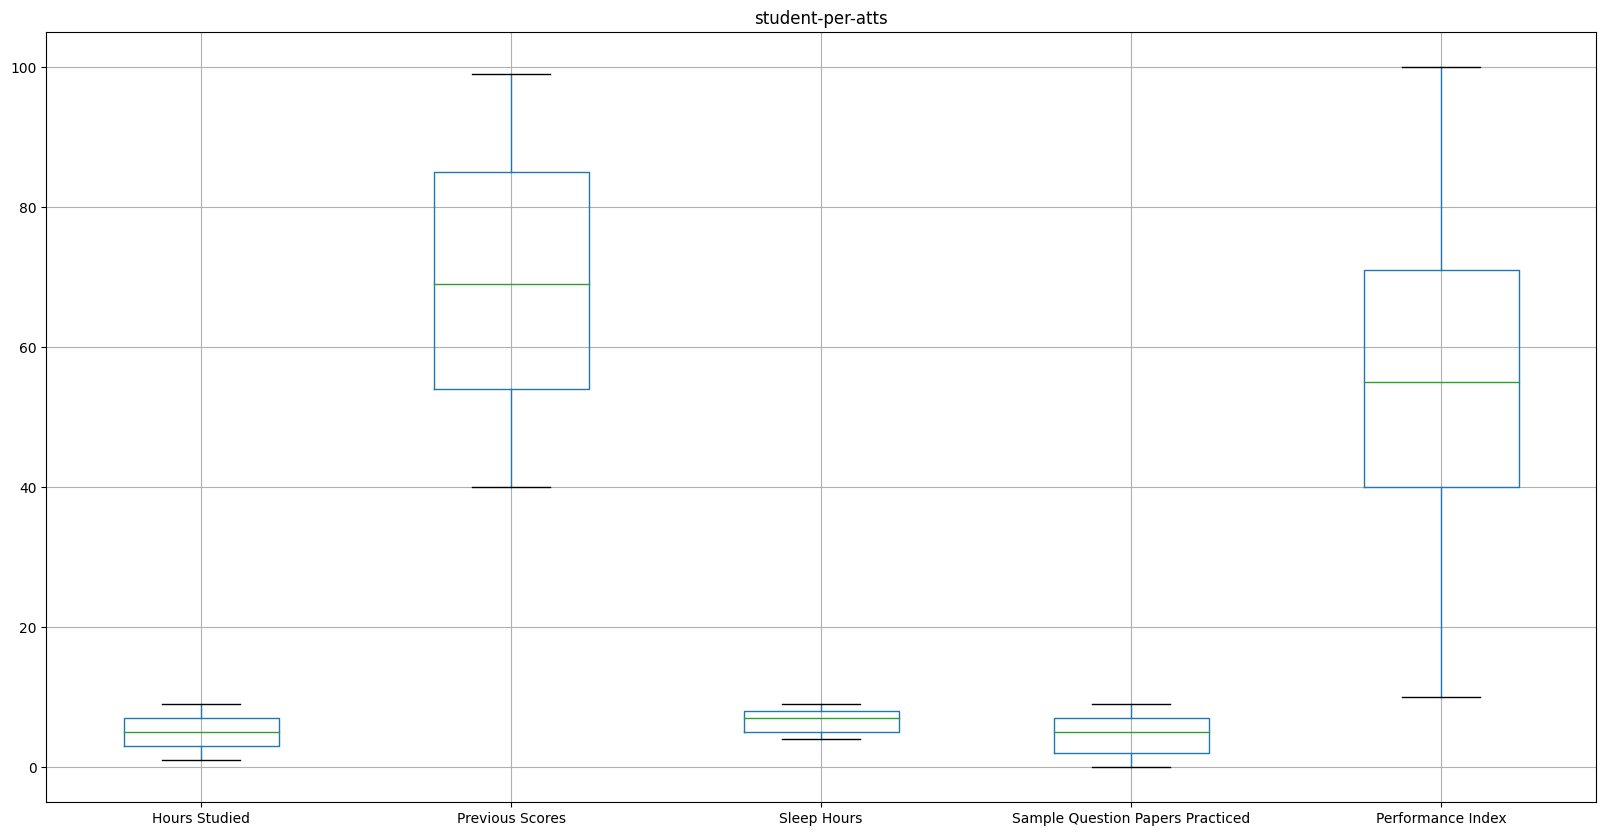

In [61]:
atts = list =['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
plt.figure(figsize=(20,10))
df[atts].boxplot()
plt.title('student-per-atts')
plt.show()

In [62]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0
2,8,51.0,Yes,7.0,2.0,45.0
3,5,52.0,Yes,5.0,2.0,36.0
4,7,75.0,No,8.0,5.0,66.0


In [63]:
df.shape


(10000, 6)

In [64]:
df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,9985.000000,9978.000000,9993.000000,9995.000000
mean,4.992900,69.442163,6.531269,4.583709,55.223612
std,2.589309,17.342610,1.695667,2.867752,19.213183
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [65]:
print(df.columns)


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [66]:
df.isna().sum().sort_values()


Hours Studied                        0
Extracurricular Activities           2
Performance Index                    5
Sample Question Papers Practiced     7
Previous Scores                     15
Sleep Hours                         22
dtype: int64

In [67]:
df.duplicated().sum()


125

<h2>Preprocessing</h2>

In [68]:
# Fill missing values
df['Extracurricular Activities'] = df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0])
df['Performance Index'] = df['Performance Index'].fillna(df['Performance Index'].mean())
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].fillna(df['Sample Question Papers Practiced'].mean())
df['Previous Scores'] = df['Previous Scores'].fillna(df['Previous Scores'].mean())
df['Sleep Hours'] = df['Sleep Hours'].fillna(df['Sleep Hours'].mean())


In [69]:
# Binary encoding for 'Extracurricular Activities'
df['Binary_Extracurricular_Active'] = df['Extracurricular Activities'].apply(lambda val: 1 if val == "Yes" else 0)

In [70]:
# Drop unnecessary columns
X = df.drop(columns=['Extracurricular Activities', 'Performance Index'])
y = df['Performance Index']


In [71]:
# Scale numeric features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [72]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

<h2>Train the Random Forest model</h2>

In [73]:
rf_model = RandomForestRegressor(
    random_state=42,
    max_depth=4, 
    max_features='sqrt',  
    min_samples_split=27,  
    min_samples_leaf=5  )
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=27, random_state=42)

In [74]:
y_pred = rf_model.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
mse

40.70824431706608

<h2>Actual vs. Predicted Results </h2>

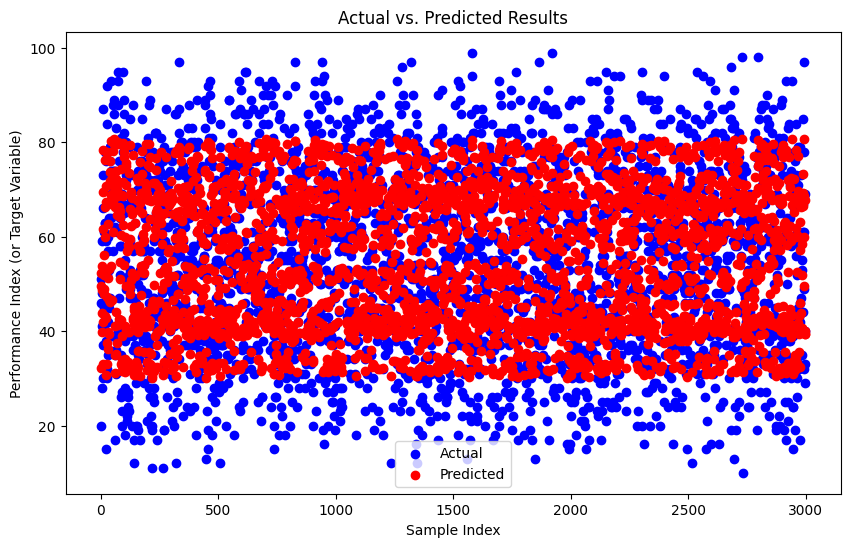

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Results')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index (or Target Variable)')
plt.legend()
plt.show()

In [77]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df)

,Actual,Predicted
6252,51.0,52.280917
4684,20.0,32.222648
1731,46.0,49.512083
4742,28.0,39.785487
4521,41.0,43.796391
...,...,...
8014,32.0,40.125317
1074,40.0,39.361349
3063,33.0,39.293676
6487,69.0,67.784462


In [1]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

NameError: name 'plt' is not defined

<h2>Evaluate the model</h2>

In [78]:
print("Random Forest R² Score:", r2_score(y_test, y_pred))
print("Random Forest Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Random Forest Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R² Score: 0.8898378562515855
Random Forest Mean Absolute Error (MAE): 5.01948561132273
Random Forest Root Mean Squared Error (RMSE): 6.38030127165372


<h2>Predict on unseen sample</h2>

In [ ]:
def predict_unseen_sample(rf_model, scaler):
    print("\nPredict unseen sample using trained model")

    try:
        hours_studied = float(input("Enter Hours Studied: "))
        previous_scores = float(input("Enter Previous Scores: "))
        sleep_hours = float(input("Enter Sleep Hours: "))
        sample_question_papers = float(input("Enter Sample Question Papers Practiced: "))
        extracurricular_active = int(input("Enter Binary_Extracurricular_Active (1 for Yes, 0 for No): "))

        unseen_sample = [[hours_studied, previous_scores, sleep_hours, sample_question_papers, extracurricular_active]]
        unseen_sample_scaled = scaler.transform(unseen_sample)

        predicted_performance = rf_model.predict(unseen_sample_scaled)
        print("Predicted Performance Index for unseen sample:", predicted_performance[0])

    except Exception as e:
        print("An error occurred during prediction:", str(e))

predict_unseen_sample(rf_model, scaler)


Predict unseen sample using trained model
